In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *

In [3]:

from pathlib import Path
import pandas as pd

In [5]:
PATH = Path('data/competitions/avito-demand-prediction')
TRAIN_JPG = PATH/'train_jpg'
TEST_JPG = PATH/'test_jpg'
list(PATH.iterdir())

[PosixPath('data/competitions/avito-demand-prediction/sample_submission.csv'),
 PosixPath('data/competitions/avito-demand-prediction/train_active.csv.zip'),
 PosixPath('data/competitions/avito-demand-prediction/train.csv.zip'),
 PosixPath('data/competitions/avito-demand-prediction/test.csv.zip'),
 PosixPath('data/competitions/avito-demand-prediction/test_active.csv.zip'),
 PosixPath('data/competitions/avito-demand-prediction/periods_train.csv.zip'),
 PosixPath('data/competitions/avito-demand-prediction/train_jpg'),
 PosixPath('data/competitions/avito-demand-prediction/periods_test.csv'),
 PosixPath('data/competitions/avito-demand-prediction/test_active.csv'),
 PosixPath('data/competitions/avito-demand-prediction/train_active.csv'),
 PosixPath('data/competitions/avito-demand-prediction/test_jpg.zip'),
 PosixPath('data/competitions/avito-demand-prediction/train.csv'),
 PosixPath('data/competitions/avito-demand-prediction/test_jpg'),
 PosixPath('data/competitions/avito-demand-prediction/t

In [6]:
#table_names = ['train', 'train_active', 'periods_train']
table_names = ['train', 'test']

In [12]:
tables = [pd.read_csv(PATH/f'{name}.csv', low_memory=False) for name in table_names]

In [13]:
from IPython.display import HTML

In [14]:
for t in tables: display(t.head())

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


In [15]:
for t in tables: display(DataFrameSummary(t).summary())

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.41806e+06,1.50342e+06,NaN,NaN,NaN,1.39084e+06,1.50342e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316708,743.674,NaN,NaN,NaN,1241.93,0.139131
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.68915e+07,5572.52,NaN,NaN,NaN,970.464,0.260079
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,0,0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,9,NaN,NaN,NaN,425,0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300,29,NaN,NaN,NaN,1057,0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000,88,NaN,NaN,NaN,2217,0.15087
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9501e+10,204429,NaN,NaN,NaN,3066,1
counts,1503424,1503424,1503424,1503424,1503424,1503424,1441848,848882,640859,1503424,1387148,1418062,1503424,1503424,1503424,1390836,1390836,1503424
uniques,1503424,771769,28,1733,9,47,371,271,1219,788377,1317102,17006,28232,21,3,1390836,3062,18407


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477853,508438,NaN,NaN,NaN,465829
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279819,825.132,NaN,NaN,NaN,1297.96
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.36422e+06,5646.87,NaN,NaN,NaN,961.065
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,8,NaN,NaN,NaN,467
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500,30,NaN,NaN,NaN,1132
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600,94,NaN,NaN,NaN,2218
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00006e+09,205064,NaN,NaN,NaN,3066
counts,508438,508438,508438,508438,508438,508438,485528,275209,202107,508438,508438,477853,508438,508438,508438,465829,465829
uniques,508438,306069,28,1644,9,47,361,255,973,298039,485209,9373,15890,9,3,465829,3047


In [16]:
train, test = tables

In [ ]:
train.groupby()

In [19]:
train['with_image'] = train['image'].notnull()

with_image
False    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
True     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

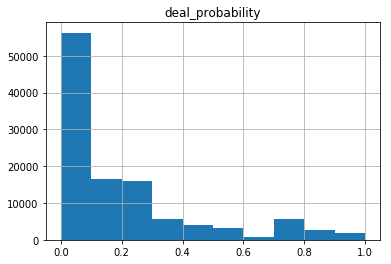

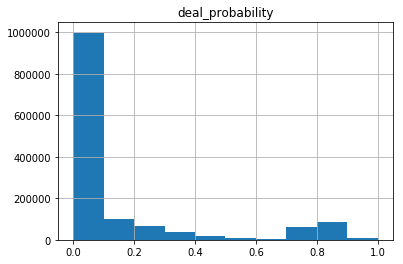

In [42]:
gg = train[['with_image', 'deal_probability']].groupby('with_image')
gg.hist()

([array([ 40732.,    302.,    154.,    699.,    307.,    579.,   1060.,    714.,    405.,    332.]),
  array([ 933987.,    1528.,     791.,    3093.,    1214.,    1101.,    5843.,    2616.,    3580.,    2023.])],
 array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 ]),
 <a list of 2 Lists of Patches objects>)

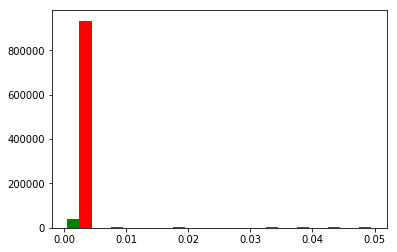

In [44]:
plt.hist([g['deal_probability'].values for key, g in train[['with_image', 'deal_probability']].groupby('with_image')], color=['g', 'r'], range=(0,0.05))

In [17]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

Новый аквариум с крышкой 35л
item_id                                                      08834bff706f
user_id                                                      6de66f4a49f0
region                                                Челябинская область
city                                                         Магнитогорск
parent_category_name                                             Животные
category_name                                                    Аквариум
param_1                                                               NaN
param_2                                                               NaN
param_3                                                               NaN
title                                        Новый аквариум с крышкой 35л
description             Продам новый аквариум на 35 литров с крышкой и...
price                                                                 900
item_seq_number                                                       173
activatio

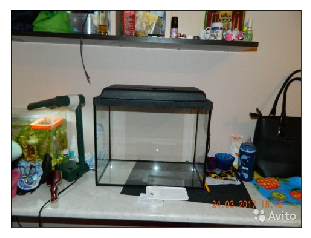

In [27]:
idx = np.random.choice(train[train.deal_probability>0.3].index)
data = train.iloc[idx]
print(data.title)
print(data)
print (data.description)
if data['with_image']:
    im = open_image(TRAIN_JPG/f'{data["image"]}.jpg')
    show_img(im)

In [196]:
active[(active.city==data.city) & (active.category_name==data.category_name) & (active.param_1==data.param_1)]

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type
26313,39def4762c44,c9a4d5738108,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Стол-тумба,Продам стол-тумбу б/у в хорошем состоянии.,600.0,112.0,2017-03-15,Company
70742,ca9626ea1218,f94d6859331f,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Офисная мебель,"Компьютерные столы, стулья, стол для переговор...",1000.0,114.0,2017-03-15,Private
142597,46ce317dadf7,e45211e9c464,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Новый Кухонный стол,"Новый кухонный стол, цвет бежевый металлик на ...",5000.0,35.0,2017-03-15,Company
597340,0e27dc4ad740,8574abd6b8e3,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Туалетный столик,Продам удобный и вместительный туалетный столи...,2500.0,29.0,2017-03-15,Private
615230,f7c6edd1b0e8,f34ea9e51604,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Садовая мебель(стол и лавки из оцилиндровки),Комплект состоит из стола и двух лавок.отшлифо...,17000.0,753.0,2017-03-15,Company
794464,4475b9ca92c5,636fe7b3fc84,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Овальный обеденный стол из массива берёзы,Материал:\tмассив березы/\nРазмер (мм):\t900х(...,34300.0,10.0,2017-03-15,Company
1048345,108e459a75bc,abd6f55bfbe9,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Стул антикварный старинный,стул из дерева резной.,49000.0,412.0,2017-03-15,Company
1073585,a5372de5fce3,6d855646b95b,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Лавка садовая,"Лавки садовые на заказ, любой сложности.Шикарн...",10.0,52.0,2017-03-15,Private
1164313,2e10b93be725,cba90acb9684,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Столы и стулья на металлическом каркасе,Нижнетагильская компания изготавливает столы и...,750.0,4.0,2017-03-15,Company
1242430,c8f61a4c1b39,403f41f42b18,Свердловская область,Нижний Тагил,Для дома и дачи,Мебель и интерьер,Столы и стулья,NaN,NaN,Стол-трансформер Дельфин,новый в собранном виде/\nсами установили на ко...,5900.0,86.0,2017-03-20,Private


In [174]:
np.sort(train.parent_category_name.unique())

array(['Бытовая электроника', 'Для бизнеса', 'Для дома и дачи', 'Животные', 'Личные вещи', 'Недвижимость',
       'Транспорт', 'Услуги', 'Хобби и отдых'], dtype=object)

In [175]:
np.sort(test.parent_category_name.unique())

array(['Бытовая электроника', 'Для бизнеса', 'Для дома и дачи', 'Животные', 'Личные вещи', 'Недвижимость',
       'Транспорт', 'Услуги', 'Хобби и отдых'], dtype=object)

In [28]:
len(train),len(test)

(1503424, 508438)

In [35]:
train.head(2)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,activation_Day,activation_Dayofweek,activation_Dayofyear,activation_Is_month_end,activation_Is_month_start,activation_Is_quarter_end,activation_Is_quarter_start,activation_Is_year_end,activation_Is_year_start,activation_Elapsed
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,28,1,87,False,False,False,False,False,False,1490659200
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,26,6,85,False,False,False,False,False,False,1490486400


In [31]:
ACT_DATE = 'activation_date'

In [37]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability', 'with_image',
       'activation_Year', 'activation_Month', 'activation_Week',
       'activation_Day', 'activation_Dayofweek', 'activation_Dayofyear',
       'activation_Is_month_end', 'activation_Is_month_start',
       'activation_Is_quarter_end', 'activation_Is_quarter_start',
       'activation_Is_year_end', 'activation_Is_year_start',
       'activation_Elapsed'],
      dtype='object')

In [38]:
train['with_image'] = train['image'].notnull()
test['with_image'] = test['image'].notnull()

In [34]:
add_datepart(train, ACT_DATE, drop=False)
add_datepart(test, ACT_DATE, drop=False)

In [39]:
train.to_feather(PATH/'train_df')

In [41]:
train = pd.read_feather(PATH/'train_df')

In [42]:
train.head().T.head(50)

,0,1,2,3,4
item_id,b912c3c6a6ad,2dac0150717d,ba83aefab5dc,02996f1dd2ea,7c90be56d2ab
user_id,e00f8ff2eaf9,39aeb48f0017,91e2f88dd6e3,bf5cccea572d,ef50846afc0b
region,Свердловская область,Самарская область,Ростовская область,Татарстан,Волгоградская область
city,Екатеринбург,Самара,Ростов-на-Дону,Набережные Челны,Волгоград
parent_category_name,Личные вещи,Для дома и дачи,Бытовая электроника,Личные вещи,Транспорт
category_name,Товары для детей и игрушки,Мебель и интерьер,Аудио и видео,Товары для детей и игрушки,Автомобили
param_1,Постельные принадлежности,Другое,"Видео, DVD и Blu-ray плееры",Автомобильные кресла,С пробегом
param_2,None,None,None,None,ВАЗ (LADA)
param_3,None,None,None,None,2110
title,Кокоби(кокон для сна),Стойка для Одежды,Philips bluray,Автокресло,"ВАЗ 2110, 2003"


In [62]:
cat_vars = ['region', 'city', 'parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3', 
           'with_image', 'image_top_1', 'user_type', 
           'activation_Year','activation_Month','activation_Day', 'activation_Dayofweek']
contin_vars = ['item_seq_number']
n = len(train); n

1503424

In [89]:
dep = 'deal_probability'
target_columns = cat_vars+contin_vars+[dep, 'item_id']
joined = train[target_columns].copy()

In [90]:
test[dep]=0
joined_test = test[target_columns].copy()

In [91]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [92]:
apply_cats(joined_test, joined)

In [93]:
for v in contin_vars:
    joined[v] = joined[v].astype('float32')
    joined_test[v] = joined_test[v].astype('float32')

In [94]:
idxs = get_cv_idxs(n, val_pct=150000/n)
joined_samp = joined.iloc[idxs].set_index('item_id')
samp_size = len(joined_samp); samp_size

150000

In [95]:
joined_samp.head(2)

,region,city,parent_category_name,category_name,param_1,param_2,param_3,with_image,image_top_1,user_type,activation_Year,activation_Month,activation_Day,activation_Dayofweek,item_seq_number,deal_probability
item_id,,,,,,,,,,,,,,,,
bd45a493569d,Красноярский край,Красноярск,Личные вещи,"Одежда, обувь, аксессуары",Аксессуары,NaN,NaN,True,256.0,Private,2017,3,19,6,99.0,0.0
321127a6a33b,Ярославская область,Ярославль,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,True,796.0,Company,2017,3,18,5,417.0,0.0


In [99]:
df, y, nas, mapper = proc_df(joined_samp, dep, do_scale=True)
yl = np.log(y)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [102]:
df_test, _, nas, mapper = proc_df(joined_test, dep, do_scale=True, skip_flds=['item_id'],
                                  mapper=mapper, na_dict=nas)

In [103]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [104]:
len(val_idx)

37500

In [105]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [106]:
from fastai.structured import *
from fastai.column_data import *
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)